In [1]:
import networkx as nx
import json as json

In [2]:
with open("Data/MMS_rv.json", 'r') as f:
    Data =  json.load(f)

In [3]:
type(Data)

list

In [4]:
Data[0]

{'ID': '1192168487',
 'code': 'QC68',
 'title': 'Family history of consanguinity',
 'defn': 'NA',
 'childs': [],
 'parents': ['1143554706'],
 'index': [{'indexTerm_title': 'Family history of consanguinity',
   'indexTerm_foundation_id': 'NA'}],
 'pcs': [],
 'is_leaf_node': True,
 'has_children': 0,
 'has_parents': 1}

In [5]:
for doc in Data:
    if(doc['ID'] == "other"):
        del(doc)
    elif("other" in doc['ID'] or "unspecified" in doc['ID']):
        pos = doc['ID'].find("/")
        doc['ID'] = doc['ID'][:pos]
    else:
        continue

In [6]:
cardio_list = list()

In [7]:
def extract_cardio(cardio):
    for doc in Data:
        if(doc['ID'] == cardio):
            cardio_list.append(doc)
            l = len(doc['childs'])
            if(l > 0):
                for i in range(l):
                    extract_cardio(doc['childs'][i])

In [8]:
for doc in Data:
    if(doc['ID'] == "426429380"):
        l = len(doc['childs'])
        if(l > 0):
            cardio_list.append(doc)
            for i in range(l):
                extract_cardio(doc['childs'][i])

In [9]:
print(cardio_list[0])

{'ID': '426429380', 'code': '11', 'title': 'Diseases of the circulatory system', 'defn': 'This refers to diseases of the organ system that passes nutrients (such as amino acids, electrolytes and lymph), gases, hormones, blood cells, etc. to and from cells in the body to help fight diseases, stabilize body temperature and pH, and to maintain homeostasis.', 'childs': ['539975693', '966120194', '924915526', '1663360295', '1964269418', '1059873720', '1703442464', '1296696944', '162683166', '1121431779', '291726710', '2135151223', '1457291912', '1458683894', '1164983645', '723430526', '1025888387', '1651137927', '1925333068', '426429380/other', '426429380/unspecified'], 'parents': ['mms'], 'index': [{'indexTerm_title': 'Other specified lower limb atherosclerosis', 'indexTerm_foundation_id': 'NA'}, {'indexTerm_title': 'Atherosclerosis of common or profunda femoral artery', 'indexTerm_foundation_id': '205736095'}, {'indexTerm_title': 'Atherosclerosis of superficial femoral artery', 'indexTerm

In [10]:
import networkx as nx

In [11]:
G = nx.Graph()
for doc in cardio_list:
    G.add_node(doc['ID'],\
               title = doc['title'],\
               code = doc['code'],\
               defn = doc['defn'],\
               childs = doc['childs'],\
               parents = doc['parents'])
    
for doc in cardio_list:
    childs = doc['childs']
    doc_id = doc['ID']
    for c_id in childs:
        G.add_edge(doc_id, c_id)

In [12]:
ROOT = [n for n in G.neighbors("426429380")]
INFO = []
for node in ROOT:
        try:
            INFO.append({"ID": node,\
                     "title": G.nodes()[node]["title"],\
                     "defn":  G.nodes()[node]['defn'],\
                     "child": len([n for n in G.neighbors(node)])})
        except:

             INFO.append({"ID": node,\
                     "title": "NA",\
                     "defn":"NA",\
                     "child": "NA"})

In [13]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 596\nNumber of edges: 595\nAverage degree:   1.9966'

In [14]:
id_list = list()
for doc in cardio_list:
    id_list.append(doc['ID'])

In [15]:
id_list[0:5]

['426429380', '539975693', '966120194', '924915526', '761947693']

In [16]:
nx.shortest_path(G, "426429380", id_list[1])

['426429380', '539975693']

In [17]:
paths = []
for id in id_list:
    paths.append({"Path" : nx.shortest_path(G, "426429380", id)})

In [18]:
len(paths)

408

In [19]:
paths[0:5]

[{'Path': ['426429380']},
 {'Path': ['426429380', '539975693']},
 {'Path': ['426429380', '966120194']},
 {'Path': ['426429380', '924915526']},
 {'Path': ['426429380', '924915526', '761947693']}]

In [20]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize = [8,8])
pos = nx.spring_layout(G)
nx.draw(G,pos, 
        with_labels=False, 
        font_weight='bold',
        font_size = 20,
        node_size=1,
        node_color='blue',
        alpha = 0.5)
plt.show()

<Figure size 800x800 with 1 Axes>

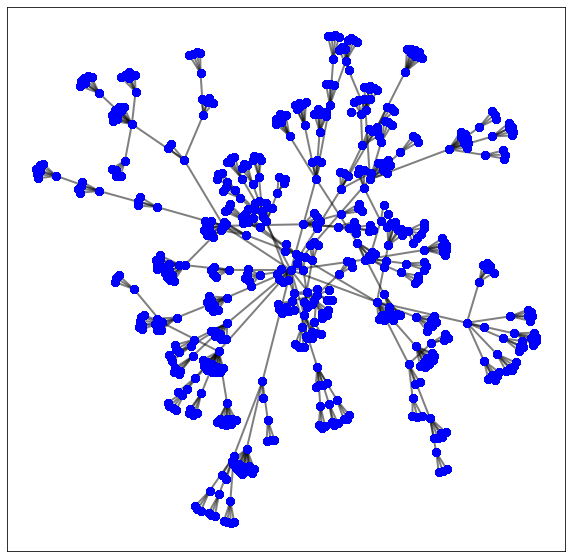

In [21]:
plt.figure(figsize = [10,10])

pos = nx.spring_layout(G)  # positions for all nodes


for node in G.nodes():
    nx.draw_networkx_nodes(G,pos,
                       node_color='blue',
                       node_size=50,
                       alpha=0.4)
for edge in G.edges():
    nx.draw_networkx_edges(G,pos,
                       edgelist=[edge],
                       width=2, alpha=0.5, edge_color='black')
plt.show()

In [22]:
import pandas as pd

In [23]:
icd_dist = pd.DataFrame(columns = ['ICD11_Code', 'Number_of_Children'])
for doc in paths[1:]:
    icd_dist = icd_dist.append({'ICD11_Code': doc['Path'][1], 'Number_of_Children': (len(doc['Path']) - 1)}, ignore_index = True)

In [24]:
icd_dist.head(10)

,ICD11_Code,Number_of_Children
0,539975693,1
1,966120194,1
2,924915526,1
3,924915526,2
4,924915526,3
5,924915526,3
6,924915526,3
7,924915526,2
8,924915526,2
9,924915526,2


In [36]:
g1 = icd_dist.groupby(['ICD11_Code']).count()
g1

,Number_of_Children
ICD11_Code,
1025888387,21
1059873720,15
1121431779,46
1164983645,71
1296696944,10
1457291912,62
1458683894,9
162683166,4
1651137927,1


In [26]:
icd_title = pd.DataFrame(columns = ['ID', 'Code', 'Title'])
for doc in cardio_list:
    icd_title = icd_title.append({'ID': doc['ID'], 'Code': doc['code'], 'Title': doc['title']}, ignore_index = True)

In [27]:
icd_title.head()

,ID,Code,Title
0,426429380,11,Diseases of the circulatory system
1,539975693,,Neoplasms of the circulatory system
2,966120194,,Developmental anomalies of the circulatory system
3,924915526,,Hypertensive diseases
4,761947693,BA00,Essential hypertension
